# SD210 TP 4 Bagging and Random Forests  
## WANG Yuqing

## 1)Use Bagging with first decision trees of depth 1 and then with decision trees characterized by a greater depth.

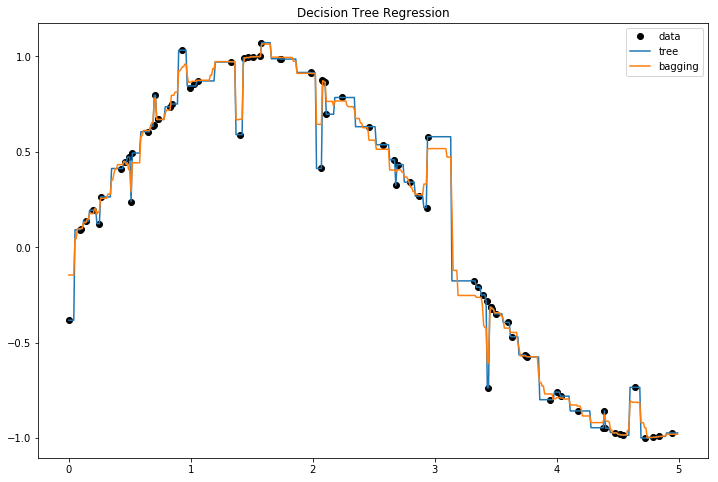

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
#bagging_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth = tree_max_depth)
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                            n_estimators=n_estimators,
                            random_state=rng)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_tree, label="tree")
plt.plot(X_test, y_bagging, label="bagging")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

## 2) Graphically illustrate the roles of L and of the tree depth

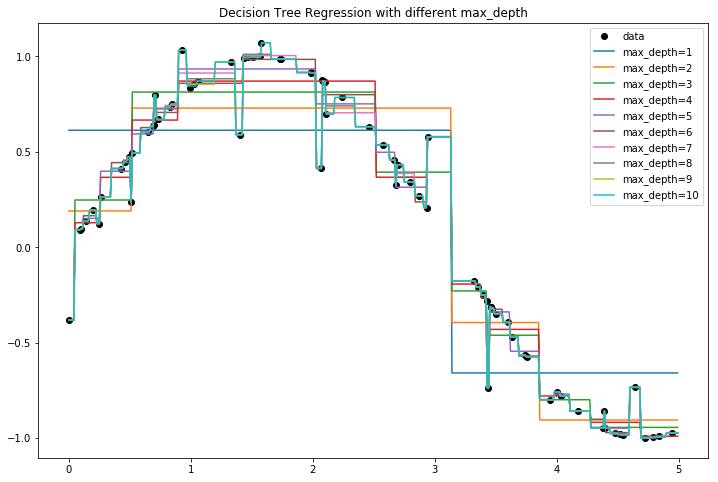

In [2]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'o', c="k", label="data")
plt.title("Decision Tree Regression with different max_depth")
for i in np.arange(1, 11):
    tree_max_depth = i
    tree = DecisionTreeRegressor(max_depth = tree_max_depth)
    tree.fit(X, y)
    #bagging = BaggingRegressor(n_estimators=n_estimators)
    #bagging.fit(X, y)
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    #y_bagging = bagging.predict(X_test)
    #plt.figure(figsize=(12, 8))
    #plt.plot(X, y, 'o', c="k", label="data")
    plt.plot(X_test, y_tree, label="max_depth="+str(i))
    #plt.plot(X, tree.predict(X)-y)
    #plt.plot(X_test, y_bagging, label="L="+str(i))
    #plt.title("Decision Tree Regression")
    plt.legend(loc=1, numpoints=1)
plt.show()

Increase max_depth, the result is more precise.

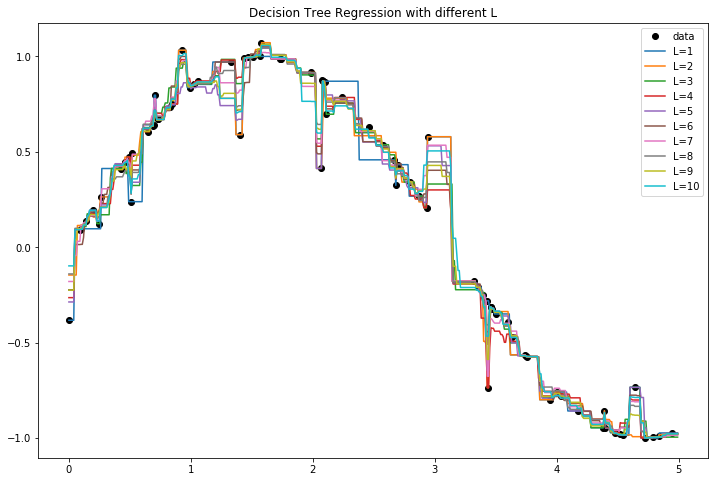

In [3]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'o', c="k", label="data")
plt.title("Decision Tree Regression with different L")
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X, y)
for i in np.arange(1, 11):
    n_estimators = i
    bagging = BaggingRegressor(base_estimator=tree,
                            n_estimators=n_estimators,
                            random_state=rng)
    bagging.fit(X, y)
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    #y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    #plt.figure(figsize=(12, 8))
    #plt.plot(X, y, 'o', c="k", label="data")
    #plt.plot(X_test, y_tree, label="tree")
    plt.plot(X_test, y_bagging, label="L="+str(i))
    #plt.plot(X, bagging.predict(X)-y)
    plt.legend(loc=1, numpoints=1)
plt.show()

With the same depth of tree, increase L, the result is more precise. 

## 3) How can we check that the estimators computed with the decision trees are biased and that the ones based on bagging reduce the variance ?

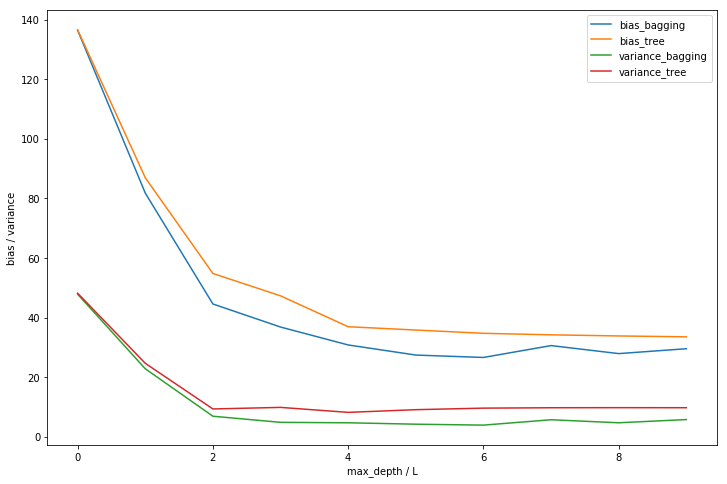

In [4]:
bias_tree = []
bias_bagging = []
variance_bagging = []
variance_tree = []
y_test = np.sin(X_test).ravel()
for i in np.arange(1, 11):
    tree_max_depth = i
    tree = DecisionTreeRegressor(max_depth = tree_max_depth)
    tree.fit(X, y)
    bias_tree.append(sum(abs(tree.predict(X_test)-y_test)))
    variance_tree.append(sum(pow(tree.predict(X_test)-y_test, 2)))
    
    n_estimators = 10
    bagging = BaggingRegressor(base_estimator=tree,
                            n_estimators=n_estimators,
                            random_state=rng)
    bagging.fit(X, y)
    bias_bagging.append(sum(abs(bagging.predict(X_test)-y_test)))
    variance_bagging.append(sum(pow(bagging.predict(X_test)-y_test, 2)))
    #bias_bagging.append(bagging.predict(X).mean()) 
plt.figure(figsize=(12,8))
plt.plot(bias_bagging, label="bias_bagging")
plt.plot(bias_tree, label="bias_tree")
plt.plot(variance_bagging, label="variance_bagging")
plt.plot(variance_tree, label="variance_tree")
plt.legend(loc=1, numpoints=1)
plt.xlabel('max_depth / L')
plt.ylabel('bias / variance')
plt.show()

We can see that the tree is biased and the one with bagging reduce the variance.

## 4) Playing with the noise level, show the over-fitting (sur-apprentissage).

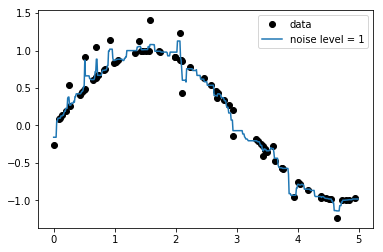

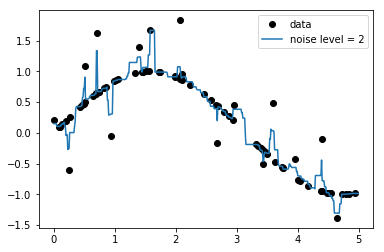

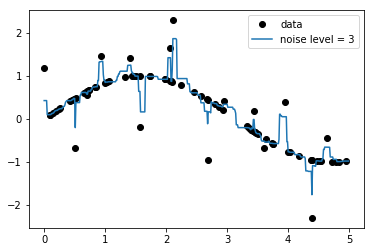

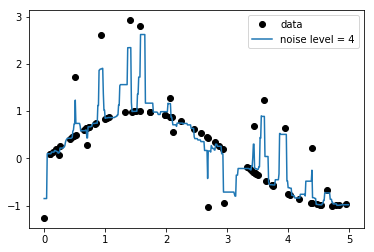

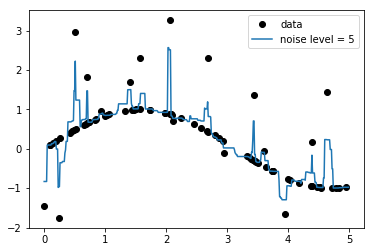

In [5]:
for n in np.arange(1, 6):
    y_noise = np.sin(X).ravel()
    y_noise[::5] += n * (0.5 - rng.rand(16))
    tree = DecisionTreeRegressor(max_depth = 10)
    tree.fit(X, y_noise)       
    bagging = BaggingRegressor(base_estimator=tree,
                            n_estimators=10,
                            random_state=rng)
    bagging.fit(X, y_noise)
    plt.plot(X, y_noise, 'o', c="k", label="data")
    plt.plot(X_test, bagging.predict(X_test), label="noise level = "+str(n))
    plt.legend(loc=1, numpoints=1)
    plt.show()

## 5) Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without replacement instead than taking the bootstrap samples.

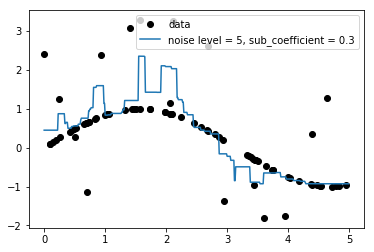

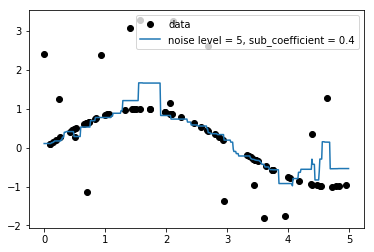

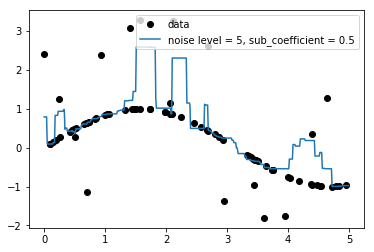

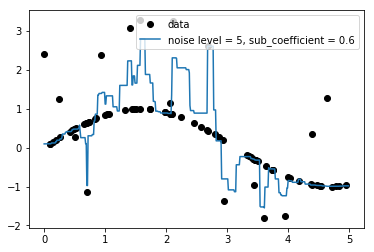

In [6]:
import random
y_noise = np.sin(X).ravel()
y_noise[::5] += 5 * (0.5 - rng.rand(16))
for sub_coefficient in np.arange(0.3, 0.7, 0.1):
    sub_coefficient = sub_coefficient
    sample_index = random.sample(np.arange(0, X.size), int(X.size*sub_coefficient))
    sample_index.sort()
    X_sub_sampling = []
    y_sub_sampling = []
    for i in np.arange(0, int(X.size*sub_coefficient)):
        X_sub_sampling.append(X[sample_index[i]])
        y_sub_sampling.append(y_noise[sample_index[i]])
    tree = DecisionTreeRegressor(max_depth = 10)
    tree.fit(X_sub_sampling, y_sub_sampling)       
    bagging = BaggingRegressor(base_estimator=tree,
                            n_estimators=10,
                            random_state=rng)
    bagging.fit(X_sub_sampling, y_sub_sampling)
    plt.plot(X, y_noise, 'o', c="k", label="data")
    plt.plot(X_test, bagging.predict(X_test), label="noise level = 5, sub_coefficient = "+str(sub_coefficient))
    plt.legend(loc=1, numpoints=1)
    plt.show()

## 6) Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.svm import SVR

boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()
cv = ShuffleSplit(n_splits=7, test_size=0.1, random_state=0)

## Random Forests
clf_random_forest = RandomForestRegressor(max_depth = 10, n_estimators=10)
score_boston_rf = cross_val_score(clf_random_forest, boston.data, boston.target, cv=cv).mean()
score_diabetes_rf = cross_val_score(clf_random_forest, diabetes.data, diabetes.target, cv=cv).mean()
score_iris_rf = cross_val_score(clf_random_forest, iris.data, iris.target, cv=cv).mean()
score_digits_rf = cross_val_score(clf_random_forest, digits.data, digits.target, cv=cv).mean()

## SVM
clf_svm = SVR(kernel='linear')
score_boston_svm = cross_val_score(clf_svm, boston.data, boston.target, cv=cv).mean()
score_diabetes_svm = cross_val_score(clf_svm, diabetes.data, diabetes.target, cv=cv).mean()
score_iris_svm = cross_val_score(clf_svm, iris.data, iris.target, cv=cv).mean()
score_digits_svm = cross_val_score(clf_svm, digits.data, digits.target, cv=cv).mean()

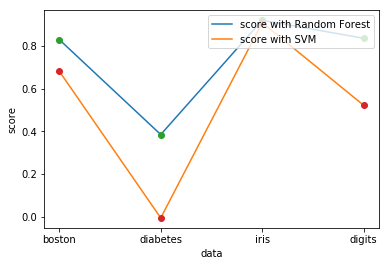

In [8]:
index_x = range(4)  
label_x = ['boston', 'diabetes', 'iris', 'digits']

score_rf = []
score_rf.append(score_boston_rf)
score_rf.append(score_diabetes_rf)
score_rf.append(score_iris_rf)
score_rf.append(score_digits_rf)
score_svm = []
score_svm.append(score_boston_svm)
score_svm.append(score_diabetes_svm)
score_svm.append(score_iris_svm)
score_svm.append(score_digits_svm)

plt.plot(range(4), score_rf, label="score with Random Forest")
plt.plot(range(4), score_svm, label="score with SVM")
plt.plot(index_x, score_rf, 'o')
plt.plot(index_x, score_svm, 'o')
plt.xticks(index_x, label_x, rotation=0)
plt.legend(loc=1, numpoints=1)
plt.xlabel('data')
plt.ylabel('score')
plt.show()

## 7) Using the data-set iris, limited to the first two variables/features, show the prediction probabilities for each class. 

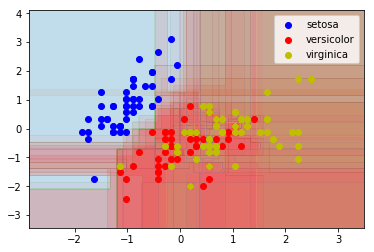

In [9]:
from sklearn import preprocessing
# Parameters
n_estimators = 10
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                     np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

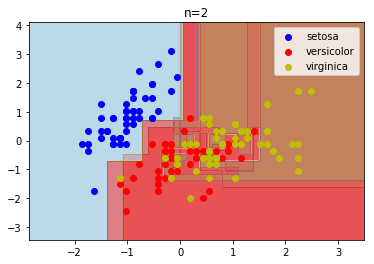

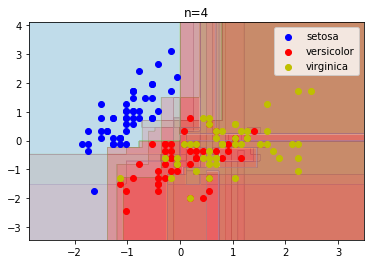

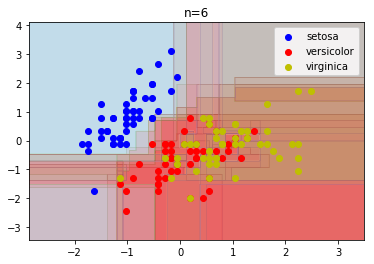

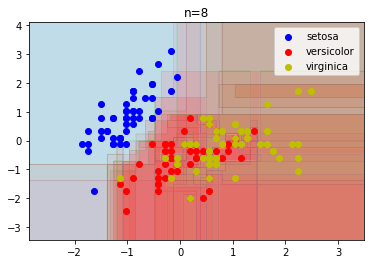

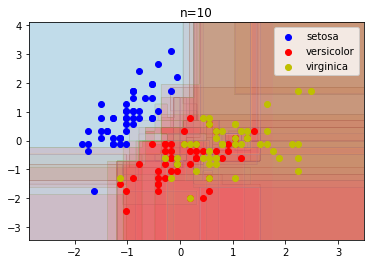

In [10]:
for n_estimators in np.arange(2, 11, 2):
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)
    plt.figure()
    for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
        plt.title("n="+str(n_estimators))
    plt.legend(scatterpoints=1)
plt.show()

## 8) Compare the scores between Random Forests with a 6-fold cross-validation and the pure decisiontrees (obtained with DecisionTreeClassifier), on the data-set iris limited to the first two features/variables.

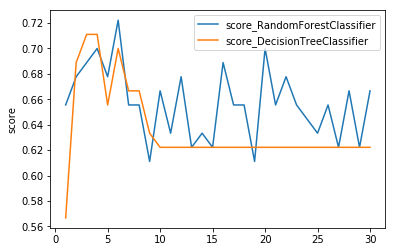

In [11]:
from sklearn import tree
cv = ShuffleSplit(n_splits=6, test_size=0.1, random_state=0)
score_rfc = []
score_dtc = []
for max_depth in np.arange(1, 31):
    clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=max_depth)
    clf_rfc.fit(X, y)
    clf_dtc = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf_dtc.fit(X, y)
    score_rfc.append(cross_val_score(clf_rfc, X, y, cv=cv).mean())
    score_dtc.append(cross_val_score(clf_dtc, X, y, cv=cv).mean())
plt.plot(np.arange(1, 31), score_rfc, label='score_RandomForestClassifier')
plt.plot(np.arange(1, 31), score_dtc, label='score_DecisionTreeClassifier')
plt.legend(loc=1, numpoints=1)
plt.ylabel('score')
plt.show()

We can see that when max_depth arrives at a certain number, the score of DecisionTreeClassifier remains the same, and the score of RandomForestClassifier is higer. So both Random Forests and deep decision trees reduce the over-fitting.